In [246]:
import torch
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

# Ensure matplotlib inline magic is enabled
%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

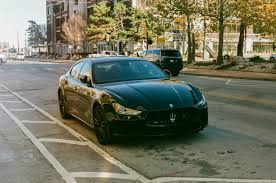

In [247]:
def load_image(image_path):
    image = Image.open(image_path)
    return image

img = load_image("images/image_1.jpg")
img

In [248]:
np.array(img).shape

(183, 276, 3)

In [249]:
def load_model():
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    model.eval()
    return model

model = load_model()
model

Using cache found in C:\Users\MercadosEMI/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-19 Python-3.12.7 torch-2.5.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Model Inference

In [250]:
result = model(img)
result

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 183x276 4 cars, 1 truck
Speed: 5.4ms pre-process, 161.7ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)

In [251]:
result.pred

[tensor([[5.93244e+01, 5.67813e+01, 2.10336e+02, 1.46211e+02, 8.62352e-01, 2.00000e+00],
         [4.03779e-02, 5.35646e+01, 7.97448e+00, 6.40080e+01, 5.35506e-01, 2.00000e+00],
         [1.38230e+02, 4.80794e+01, 1.82482e+02, 7.66798e+01, 5.00441e-01, 2.00000e+00],
         [1.37800e+02, 4.83169e+01, 1.83312e+02, 7.63326e+01, 4.98568e-01, 7.00000e+00],
         [1.54697e+01, 5.26708e+01, 2.48863e+01, 6.03662e+01, 4.24714e-01, 2.00000e+00]])]

In [252]:
confidence = {}

for idx, res in enumerate(result.pred[0]):
    confidence[f"{result.names[res[5].item()]}_{idx}"] = res[4]

confidence

{'car_0': tensor(0.86235),
 'car_1': tensor(0.53551),
 'car_2': tensor(0.50044),
 'truck_3': tensor(0.49857),
 'car_4': tensor(0.42471)}

Detection of bounding box

In [253]:
def detect_boundary(result):
    detections = {}

    for idx, res in enumerate(result.pred[0]):
        if res[4].item() > 0.6:
            element = f"{result.names[res[5].item()]}_{idx}"
            detections[element] = {}
            detections[element]['confidence'] = res[4].item()
            detections[element]['class'] = result.names[res[5].item()]
            detections[element]['bbox'] = res[:4]

    return detections

detect_boundary(result=result)

{'car_0': {'confidence': 0.8623521327972412,
  'class': 'car',
  'bbox': tensor([ 59.32439,  56.78127, 210.33603, 146.21138])}}

In [254]:
imgn = [1, 2, 3, 5, 6]

for i in imgn:
    image = load_image(f"images/image_{i}.jpg")
    result = model(image)
    bb = detect_boundary(result=result)
    print(bb)

{'car_0': {'confidence': 0.8623521327972412, 'class': 'car', 'bbox': tensor([ 59.32439,  56.78127, 210.33603, 146.21138])}}
{'car_0': {'confidence': 0.7347175478935242, 'class': 'car', 'bbox': tensor([172.10756, 103.97265, 221.78760, 140.23811])}}
{'bed_0': {'confidence': 0.8528490662574768, 'class': 'bed', 'bbox': tensor([ 413.23914,  526.95422, 1179.85254,  988.28394])}, 'potted plant_1': {'confidence': 0.7801806926727295, 'class': 'potted plant', 'bbox': tensor([1017.12683,  515.00006, 1135.08313,  633.25043])}}
{'person_0': {'confidence': 0.9551242589950562, 'class': 'person', 'bbox': tensor([190.25493,  50.11068, 246.10854, 181.12866])}, 'person_1': {'confidence': 0.9316143989562988, 'class': 'person', 'bbox': tensor([103.11487,  34.28029, 161.12727, 182.84975])}, 'person_2': {'confidence': 0.9099944829940796, 'class': 'person', 'bbox': tensor([ 47.58092,  52.54795, 101.47597, 182.69672])}}
{'tv_0': {'confidence': 0.8406280279159546, 'class': 'tv', 'bbox': tensor([105.84309,  52.2

Making boundary box

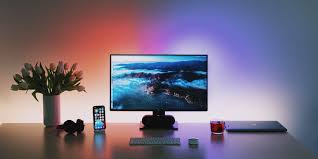

In [255]:
image

In [256]:
np.array(image).shape


(159, 318, 3)

In [257]:
im = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
im.shape


(159, 318, 3)

In [258]:
# Colors for each classes
colors = {
    'red': (0, 0, 255),    # OpenCV uses BGR format
    'blue': (255, 0, 0),
    'green': (0, 255, 0),
    'purple': (128, 0, 128),
    'brown': (42, 42, 165),
    'black': (0, 0, 0)
}
colors

{'red': (0, 0, 255),
 'blue': (255, 0, 0),
 'green': (0, 255, 0),
 'purple': (128, 0, 128),
 'brown': (42, 42, 165),
 'black': (0, 0, 0)}

In [259]:
bb

{'tv_0': {'confidence': 0.8406280279159546,
  'class': 'tv',
  'bbox': tensor([105.84309,  52.25096, 209.58746, 114.93695])},
 'vase_1': {'confidence': 0.7339836359024048,
  'class': 'vase',
  'bbox': tensor([ 41.97955,  94.64209,  62.35292, 127.60681])},
 'potted plant_2': {'confidence': 0.6842234134674072,
  'class': 'potted plant',
  'bbox': tensor([ 10.33913,  60.07026,  86.29684, 127.51970])}}

In [260]:
result.names


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [261]:
{v:k for k, v in result.names.items()}


{'person': 0,
 'bicycle': 1,
 'car': 2,
 'motorcycle': 3,
 'airplane': 4,
 'bus': 5,
 'train': 6,
 'truck': 7,
 'boat': 8,
 'traffic light': 9,
 'fire hydrant': 10,
 'stop sign': 11,
 'parking meter': 12,
 'bench': 13,
 'bird': 14,
 'cat': 15,
 'dog': 16,
 'horse': 17,
 'sheep': 18,
 'cow': 19,
 'elephant': 20,
 'bear': 21,
 'zebra': 22,
 'giraffe': 23,
 'backpack': 24,
 'umbrella': 25,
 'handbag': 26,
 'tie': 27,
 'suitcase': 28,
 'frisbee': 29,
 'skis': 30,
 'snowboard': 31,
 'sports ball': 32,
 'kite': 33,
 'baseball bat': 34,
 'baseball glove': 35,
 'skateboard': 36,
 'surfboard': 37,
 'tennis racket': 38,
 'bottle': 39,
 'wine glass': 40,
 'cup': 41,
 'fork': 42,
 'knife': 43,
 'spoon': 44,
 'bowl': 45,
 'banana': 46,
 'apple': 47,
 'sandwich': 48,
 'orange': 49,
 'broccoli': 50,
 'carrot': 51,
 'hot dog': 52,
 'pizza': 53,
 'donut': 54,
 'cake': 55,
 'chair': 56,
 'couch': 57,
 'potted plant': 58,
 'bed': 59,
 'dining table': 60,
 'toilet': 61,
 'tv': 62,
 'laptop': 63,
 'mouse':

0
{'confidence': 0.8406280279159546, 'class': 'tv', 'bbox': tensor([105.84309,  52.25096, 209.58746, 114.93695])}
tv 0.8406280279159546 105 52 209 114
brown (42, 42, 165)
1
{'confidence': 0.7339836359024048, 'class': 'vase', 'bbox': tensor([ 41.97955,  94.64209,  62.35292, 127.60681])}
vase 0.7339836359024048 41 94 62 127
green (0, 255, 0)
2
{'confidence': 0.6842234134674072, 'class': 'potted plant', 'bbox': tensor([ 10.33913,  60.07026,  86.29684, 127.51970])}
potted plant 0.6842234134674072 10 60 86 127
brown (42, 42, 165)


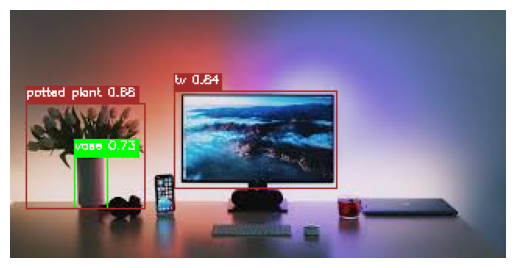

In [262]:
for i, a in enumerate(bb.keys()):
    print(i)
    print(bb[a])
    bbox = bb[a]['bbox']
    [x1, y1, x2, y2] = bbox.tolist()
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    class_name = bb[a]['class']
    confidence = bb[a]['confidence']
    print(class_name, confidence, x1, y1, x2, y2)

    color_name = random.choice(list(colors.keys()))
    color = colors[color_name]
    print(color_name, color)
    # color = random.choice(colors)
    # print(color)

    cv2.rectangle(im, (x1, y1), (x2, y2), color, 1)
    label = f"{class_name} {confidence:.2f}"

        # Get the text size
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.25, 2)

    # Draw the rectangle for the text background
    cv2.rectangle(im, (x1, y1 - text_height - 5), (x1 + text_width, y1), color, -1)

    # Put the text on the image
    cv2.putText(im, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 255, 255), 1)

im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.axis('off') 
plt.show()
